<a href="https://colab.research.google.com/github/NoamanAhmed-M/Supervised-ML-Practice-Notebooks/blob/main/number_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
pip install numpy pandas matplotlib tensorflow kagglehub autils

In [84]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline
import os
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
from sklearn.model_selection import train_test_split


In [85]:

# Download latest version
path = kagglehub.dataset_download("kanzariachref/mnist-handwritten-digits-0-and-1-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-handwritten-digits-0-and-1-dataset' dataset.
Path to dataset files: /kaggle/input/mnist-handwritten-digits-0-and-1-dataset


In [86]:
DATASET_PATH = "/content/sample_data/"
os.listdir(DATASET_PATH)
df = pd.read_csv(
    os.path.join(DATASET_PATH, "mnist_train_small.csv"),
    header=None
)

In [87]:
df.head(10)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


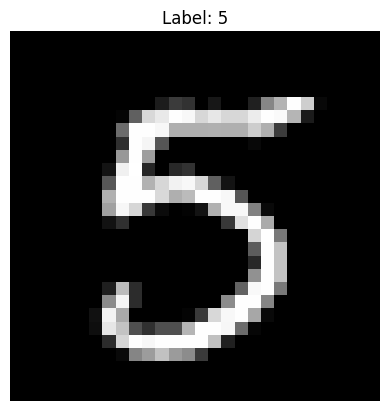

In [88]:
idx = 1

label = df.iloc[idx, 0]
pixels = df.iloc[idx, 1:].values.reshape(28, 28)

plt.imshow(pixels, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [89]:
X = df.iloc[:, 1:].values / 255.0   # normalize in the same step
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (16000, 784)
X_test: (4000, 784)
y_train: (16000,)
y_test: (4000,)


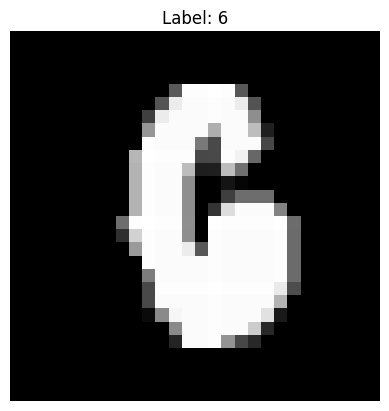

In [90]:
idx = 7

label = y_train[idx]
pixels = X_train[idx].reshape(28, 28)

plt.imshow(pixels, cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [91]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="sigmoid"),
        tf.keras.layers.Dense(10, activation="softmax")
    ], name = "my_model"
)


In [92]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,995 (78.11 KB)

 Trainable params: 19,995 (78.11 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,  # Optional: explicitly set batch size
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.1888 - loss: 2.1473
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6851 - loss: 1.3649
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8100 - loss: 0.9203
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8752 - loss: 0.6614
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 0.4761
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9171 - loss: 0.3902
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9277 - loss: 0.3209
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9303 - loss: 0.2935
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9398 - loss: 0.2561
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9439 - loss: 0.2300
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9481 - loss: 0.2175
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/st

In [94]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error Rate: {(1-test_accuracy)*100:.2f}%")

# Method 2: Get predictions and analyze
print("\n" + "="*50)
print("DETAILED PREDICTION ANALYSIS")
print("="*50)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9259 - loss: 0.2384

Test Loss: 0.2353
Test Accuracy: 0.9298
Test Error Rate: 7.02%

DETAILED PREDICTION ANALYSIS


In [95]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)
manual_accuracy = correct_predictions / total_predictions
print(f"Manual Accuracy Calculation: {correct_predictions}/{total_predictions} = {manual_accuracy:.4f}")

# 4. Show misclassified examples
print("\n" + "="*50)
print("MISCLASSIFIED EXAMPLES")
print("="*50)

misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified images: {len(misclassified_indices)}")


Manual Accuracy Calculation: 3719/4000 = 0.9297

MISCLASSIFIED EXAMPLES
Number of misclassified images: 281


In [97]:
num_examples_to_show = min(5, len(misclassified_indices))
for i in range(num_examples_to_show):
    idx = misclassified_indices[i]
    print(f"Example {i+1}:")
    print(f"  True label: {y_test[idx]}")
    print(f"  Predicted: {y_pred[idx]}")
    print(f"  Confidence: {np.max(y_pred_probs[idx]):.4f}")
    print()

# 5. Per-class accuracy
print("\n" + "="*50)
print("PER-CLASS ACCURACY")
print("="*50)

for digit in range(10):
    indices = np.where(y_test == digit)[0]
    if len(indices) > 0:
        correct = np.sum(y_pred[indices] == y_test[indices])
        total = len(indices)
        accuracy = correct / total
        print(f"Digit {digit}: {correct}/{total} = {accuracy:.4f}")

Example 1:
  True label: 8
  Predicted: 5
  Confidence: 0.5512

Example 2:
  True label: 4
  Predicted: 9
  Confidence: 0.5833

Example 3:
  True label: 8
  Predicted: 5
  Confidence: 0.5564

Example 4:
  True label: 2
  Predicted: 0
  Confidence: 0.5145

Example 5:
  True label: 8
  Predicted: 5
  Confidence: 0.5279


PER-CLASS ACCURACY
Digit 0: 390/409 = 0.9535
Digit 1: 458/471 = 0.9724
Digit 2: 358/387 = 0.9251
Digit 3: 389/425 = 0.9153
Digit 4: 355/390 = 0.9103
Digit 5: 294/334 = 0.8802
Digit 6: 383/401 = 0.9551
Digit 7: 415/441 = 0.9410
Digit 8: 322/351 = 0.9174
Digit 9: 355/391 = 0.9079



Confusion Matrix:
[[390   0   4   0   2   2   2   1   6   2]
 [  0 458   3   0   2   4   0   1   3   0]
 [  5   2 358   8   5   2   0   2   5   0]
 [  0   1  11 389   0   9   2   0   9   4]
 [  1   1   5   1 355   3   6   0   0  18]
 [  7   1   2  12   0 294   4   0  10   4]
 [  4   1   3   0   5   2 383   0   3   0]
 [  0   3   9   5   3   0   0 415   0   6]
 [  3   5   6   1   0   8   3   0 322   3]
 [  0   1   0   3  13   2   0  12   5 355]]


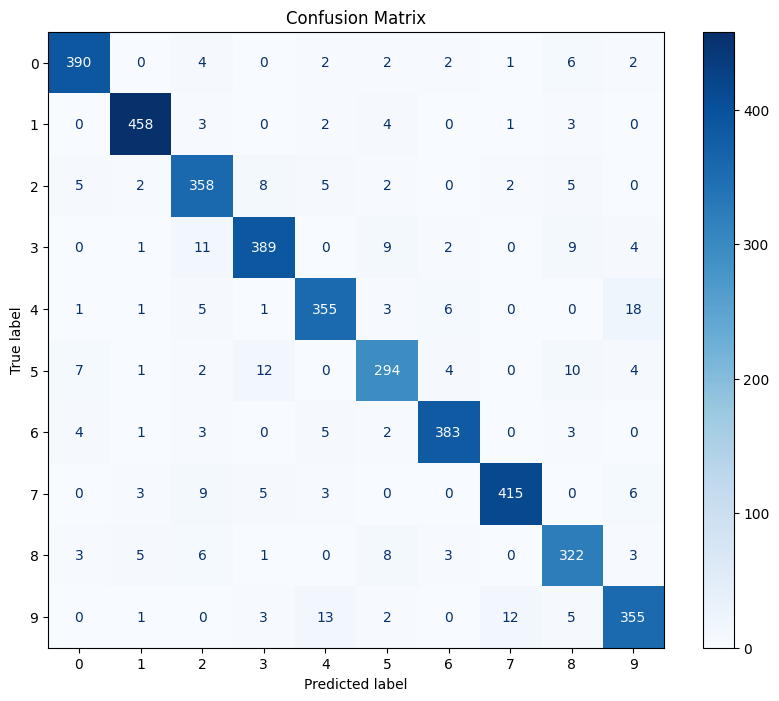

In [98]:
try:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(ax=ax, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

except ImportError:
    print("\nInstall scikit-learn and matplotlib for confusion matrix visualization:")


In [99]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(35, activation="relu"),
        tf.keras.layers.Dense(20, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ], name = "my_model"
)
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 35)             │         1,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 20)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,075 (164.36 KB)

 Trainable params: 42,075 (164.36 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,  # Optional: explicitly set batch size
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9951 - loss: 0.0128
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0075
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9952 - loss: 0.0146
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9959 - loss: 0.0118
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0238
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9976 - loss: 0.0076
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0070
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0131
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9969 - loss: 0.0114
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9965 - loss: 0.0092
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9986 - loss: 0.0052
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [102]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error Rate: {(1-test_accuracy)*100:.2f}%")

# Method 2: Get predictions and analyze
print("\n" + "="*50)
print("DETAILED PREDICTION ANALYSIS")
print("="*50)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9508 - loss: 0.3678

Test Loss: 0.3715
Test Accuracy: 0.9505
Test Error Rate: 4.95%

DETAILED PREDICTION ANALYSIS


In [103]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [104]:
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)
manual_accuracy = correct_predictions / total_predictions
print(f"Manual Accuracy Calculation: {correct_predictions}/{total_predictions} = {manual_accuracy:.4f}")

# 4. Show misclassified examples
print("\n" + "="*50)
print("MISCLASSIFIED EXAMPLES")
print("="*50)

misclassified_indices = np.where(y_pred != y_test)[0]
print(f"Number of misclassified images: {len(misclassified_indices)}")


Manual Accuracy Calculation: 3802/4000 = 0.9505

MISCLASSIFIED EXAMPLES
Number of misclassified images: 198


In [105]:
num_examples_to_show = min(5, len(misclassified_indices))
for i in range(num_examples_to_show):
    idx = misclassified_indices[i]
    print(f"Example {i+1}:")
    print(f"  True label: {y_test[idx]}")
    print(f"  Predicted: {y_pred[idx]}")
    print(f"  Confidence: {np.max(y_pred_probs[idx]):.4f}")
    print()

# 5. Per-class accuracy
print("\n" + "="*50)
print("PER-CLASS ACCURACY")
print("="*50)

for digit in range(10):
    indices = np.where(y_test == digit)[0]
    if len(indices) > 0:
        correct = np.sum(y_pred[indices] == y_test[indices])
        total = len(indices)
        accuracy = correct / total
        print(f"Digit {digit}: {correct}/{total} = {accuracy:.4f}")

Example 1:
  True label: 4
  Predicted: 9
  Confidence: 0.9695

Example 2:
  True label: 2
  Predicted: 0
  Confidence: 0.4933

Example 3:
  True label: 5
  Predicted: 3
  Confidence: 0.8356

Example 4:
  True label: 9
  Predicted: 4
  Confidence: 0.7741

Example 5:
  True label: 9
  Predicted: 4
  Confidence: 0.5701


PER-CLASS ACCURACY
Digit 0: 398/409 = 0.9731
Digit 1: 463/471 = 0.9830
Digit 2: 358/387 = 0.9251
Digit 3: 374/425 = 0.8800
Digit 4: 377/390 = 0.9667
Digit 5: 314/334 = 0.9401
Digit 6: 391/401 = 0.9751
Digit 7: 421/441 = 0.9546
Digit 8: 337/351 = 0.9601
Digit 9: 369/391 = 0.9437



Confusion Matrix:
[[398   0   0   2   0   2   1   0   5   1]
 [  0 463   3   0   1   0   0   0   4   0]
 [  5   2 358   3   5   0   0   4   8   2]
 [  3   2   6 374   0  12   1   0  21   6]
 [  1   2   0   1 377   0   0   2   0   7]
 [  2   1   0   4   0 314   0   0   8   5]
 [  0   0   1   0   2   4 391   0   3   0]
 [  0   1   4   1   3   0   0 421   1  10]
 [  1   1   1   2   2   2   0   0 337   5]
 [  0   1   0   1   8   0   0   8   4 369]]


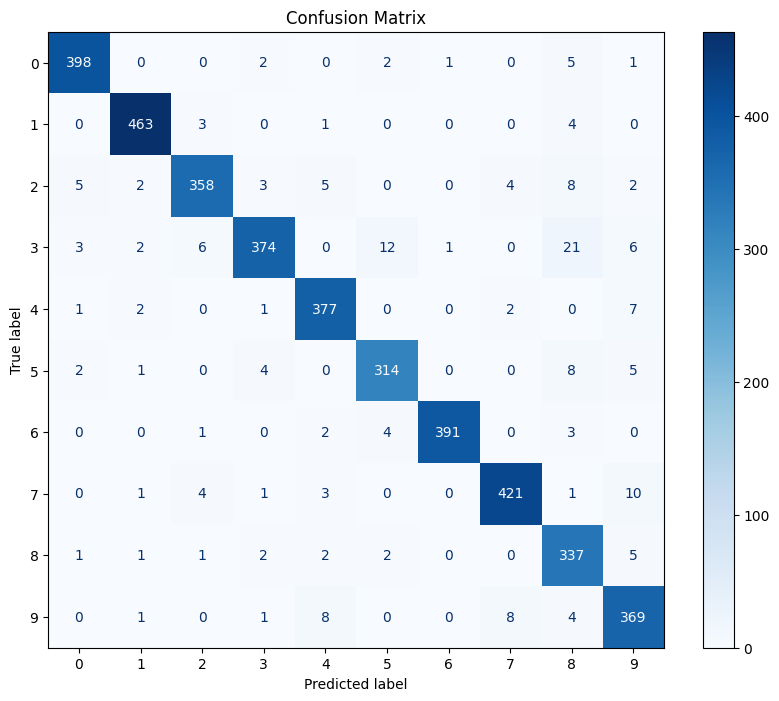

In [106]:
try:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(ax=ax, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

except ImportError:
    print("\nInstall scikit-learn and matplotlib for confusion matrix visualization:")
